In [8]:
# pip3 install pandas 
import pandas as pd

import numpy as np

# problems for Nov 16

# import the data set

data = pd.read_csv("~/Desktop/python-data-analysis_RuijuanL/chapter_4/data/Brapa_cpm.csv")

data = np.array(data)

data.shape
data[0:3,0:3] # print the first 3 samples first 3 genes values 
data[data < 0].shape
# rows are genes (100 genes), columns are samples (36)

(16,)

In [36]:
# Q1: make a new array where the values are converted to log2 cpm
# replace negatives and zero with positive min value 
data_2 = np.where(data > 0, data, data[data > 0].min()) # why are there negative values? 
data_log2 = np.log2(data_2)
data_log2[0:3, 0:3]

array([[-0.3812662 , -1.62549574, -1.25391813],
       [ 3.95531712,  3.66145377,  3.61294041],
       [-0.37564489, -0.02549485, -0.4465632 ]])

In [37]:
# Q2: Which gene has the highest expression?
np.max(data_log2)

9.616585599872312

In [38]:
np.where(data_log2==np.max(data_log2)) # row 83, col 4 

(array([83]), array([4]))

In [39]:
# Q3: Make a new array in which each row is sorted by expression
data_sorted = np.sort(data_log2, axis=1) 
data_sorted[0:3,0:3]

array([[-7.39164159, -7.39164159, -7.39164159],
       [ 3.57579875,  3.61294041,  3.66145377],
       [-1.71091226, -1.70441931, -1.56741586]])

In [40]:
# Q4: Make a new array in which the samples are sorted according to average expression.  NOTE this is different than sorting each row...explain how
# calc. the average for each column, then sort columns based the averages 

indexer = np.mean(data_log2, axis=0).argsort()

In [41]:
np.mean(data_log2, axis=0)[indexer]

array([-0.13162466,  0.01722934,  0.03393228,  0.0648103 ,  0.08965546,
        0.1003771 ,  0.14598664,  0.14744709,  0.16420508,  0.16960409,
        0.18903806,  0.20820288,  0.21183151,  0.22072715,  0.23018366,
        0.23584093,  0.24613962,  0.24834476,  0.25634198,  0.27197531,
        0.28017579,  0.28171417,  0.29090921,  0.30893413,  0.31393271,
        0.3183693 ,  0.31997188,  0.32712658,  0.33703118,  0.35551922,
        0.35693326,  0.35696776,  0.37616761,  0.37919052,  0.43682551,
        0.45059008])

In [42]:
data_sorted2 = data_log2[:, indexer] 
data_sorted2.shape

(100, 36)

In [43]:
# Q5: what is the total number of unique values in the table?

np.unique(data_log2).shape

(2195,)

In [47]:
# Q6: Make a new array in which any cell that has less than 10 cpm is replaced with 0

data_3 = np.where(data >= 10, data, 0)
data_3[0:3,0:3]

array([[ 0.        ,  0.        ,  0.        ],
       [15.51204642, 12.65340514, 12.23498485],
       [ 0.        ,  0.        ,  0.        ]])

In [63]:
# Q7: Make a new array that only retains genes that are expressed at > 10 cpm in at least half the samples.  (I haven't checked, maybe all genes will pass)

filter = np.sum(data > 10, axis=1) 
filter

array([ 0, 36,  0, 36,  0,  0,  3, 36, 36, 24,  0,  1,  0,  0,  0,  0, 36,
        0,  7, 36,  0,  0,  0,  3,  0, 36, 36,  0,  0,  0, 15, 36,  2,  4,
       36,  0,  0,  0, 20,  0,  0,  5, 36,  0, 36,  0, 36, 31,  0,  0,  0,
        0, 36, 36,  0,  0, 36, 36, 35,  0,  0,  0, 36,  0,  0,  1,  8,  0,
        0, 36,  0, 36, 12,  0, 36,  0,  0, 31, 13,  0,  0,  0, 19, 36, 36,
        0,  0,  5,  0, 36, 17, 17,  0,  0, 36,  0,  0, 36, 36,  0])

In [82]:
np.sum(filter > 18)
# np.extract[data[filter > 36 * 0.5]]

33

In [84]:
data_filtered = data[filter > 18, :]
data_filtered.shape

(33, 36)

In [96]:
# Q8 calculate the standard deviation for each gene using the builtin function

data_std = np.std(data, axis=1)
data_std[0:10]

array([0.3609504 , 2.04130479, 3.39034592, 7.58404114, 0.84646149,
       0.46792204, 3.30205839, 5.48029964, 4.33871817, 5.90066361])

In [114]:
# Q9 calcualte the standard deviation for each gene WITHOUT using the builtin function

# calc. the mean for each gene --> for each gene value, minus its mean, then square --> 
# sum all squared values --> devide by the number of data points, then take square root 

gene_mean = np.mean(data, axis=1, keepdims=True)
gene_mean.shape

(100, 1)

In [128]:
gene_square = np.square(data - gene_mean)
data_std2 = np.sqrt(np.sum(gene_square, axis=1)/36) 
data_std2[0:10]

array([0.3609504 , 2.04130479, 3.39034592, 7.58404114, 0.84646149,
       0.46792204, 3.30205839, 5.48029964, 4.33871817, 5.90066361])

In [129]:
# Q10 create a slice that contains the first 10 samples

data[:,0:10]

array([[7.67763456e-01, 3.24098503e-01, 4.19307887e-01, 1.13099691e+00,
        0.00000000e+00, 8.72953347e-01, 0.00000000e+00, 0.00000000e+00,
        6.03602948e-01, 0.00000000e+00],
       [1.55120464e+01, 1.26534051e+01, 1.22349849e+01, 1.19240196e+01,
        1.60253260e+01, 1.55811988e+01, 1.32974897e+01, 1.26599674e+01,
        1.70910175e+01, 1.66190646e+01],
       [7.70760805e-01, 9.82483546e-01, 7.33788803e-01, 4.87178533e-01,
        4.90331043e-01, 7.36190656e-01, 7.53389851e-01, 4.74891792e-01,
        3.05466853e-01, 5.62336727e-01],
       [3.54812668e+01, 4.87690464e+01, 4.44683352e+01, 4.37802439e+01,
        3.79066757e+01, 3.62440045e+01, 4.64650021e+01, 4.77761529e+01,
        4.92132574e+01, 4.01588516e+01],
       [1.22842153e+00, 2.10664027e+00, 1.04826972e+00, 1.45413888e+00,
        9.80662086e-01, 2.47336782e+00, 1.04583942e+00, 1.10313879e+00,
        1.35810663e+00, 3.48159898e+00],
       [1.22842153e+00, 0.00000000e+00, 9.43442747e-01, 1.29256789e+00,
   

In [98]:
# Q11 Changing topics...generate and plot a 2D random walk (see Chapter 4.7)

In [12]:
# one d random walk 
%matplotlib inline
import matplotlib.pyplot as plt

import random
position = 0 
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1 # Return a random integer N such that a <= N <= b.
    # step = 1 if get 1, step = -1 if 0 
    position += step
    walk.append(position)

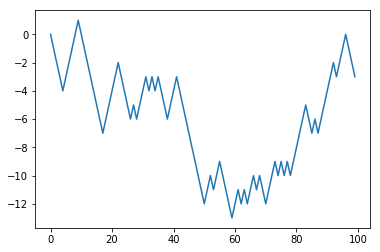

In [13]:
plt.plot(walk[:100])

In [14]:
# two d random walk 
nwalks = 2
nsteps = 1000
draws = np.random.randint( 0, 2, size =( nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) # cumulative sum on thr row direction 
walks.shape

(2, 1000)

In [15]:
walks

array([[ 1,  2,  3, ...,  2,  3,  2],
       [ 1,  0, -1, ...,  4,  3,  4]])

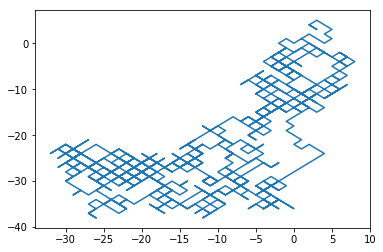

In [44]:
plt.plot(walks[0], walks[1]) # understand how to slice array w/ or w/o dimension reduction 